In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

# Excercise1

In [2]:
(2.75 + 3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

In [3]:
1.4*numpy.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [4]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

# Excercise 2

In [5]:
def jukowski(z,c):
    ju= z + c**2/z
    return ju

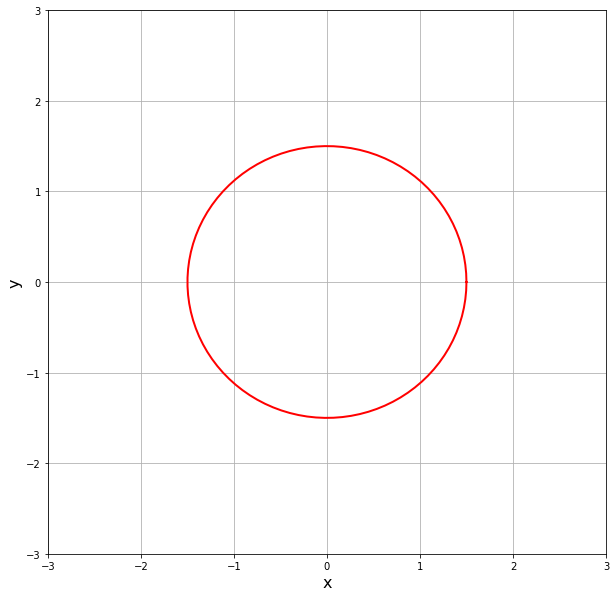

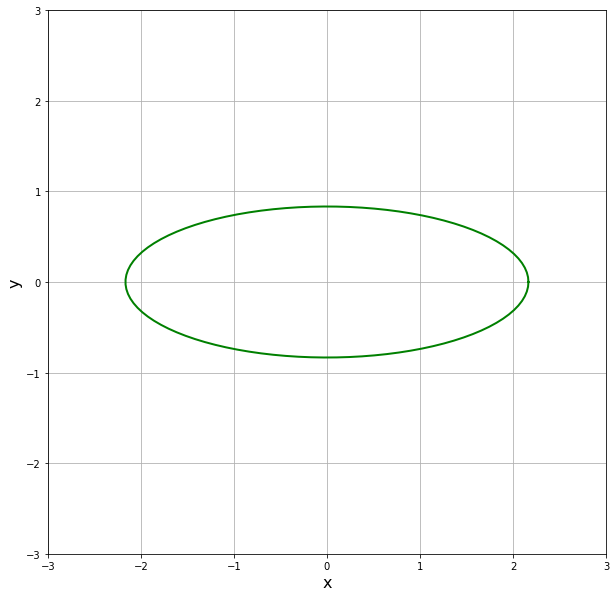

In [6]:
R,c,N = 1.5,1.0,100
theta  = numpy.linspace(0,2*numpy.pi,N)
circ1 = R*numpy.cos(theta) + R*numpy.sin(theta)*1j
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(circ1.real,circ1.imag, color = 'red',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

x1 = jukowski(circ1,c)
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x1.real,x1.imag,color = 'green',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

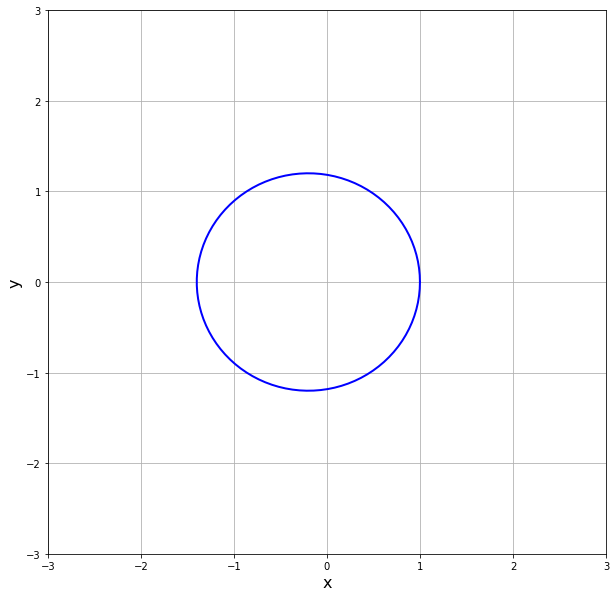

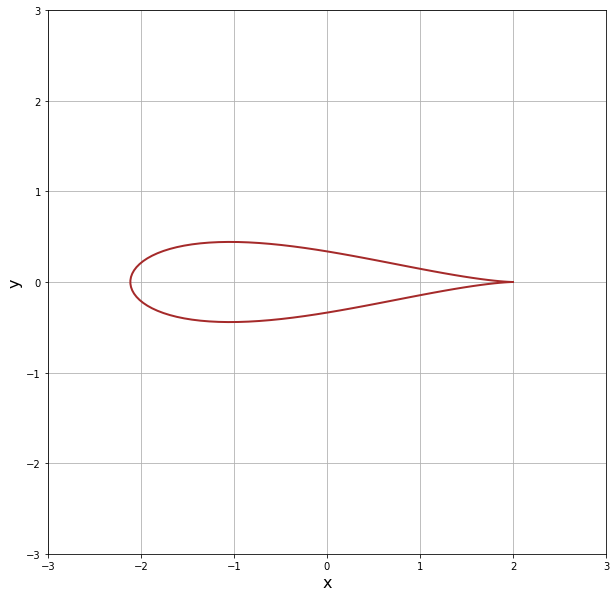

In [7]:
r = 1.2
circ2 = r*numpy.cos(theta) + r*numpy.sin(theta)*1j-0.2
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(circ2.real,circ2.imag, color = 'blue',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

x2 = jukowski(circ2,c)
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x2.real,x2.imag,color = 'brown',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

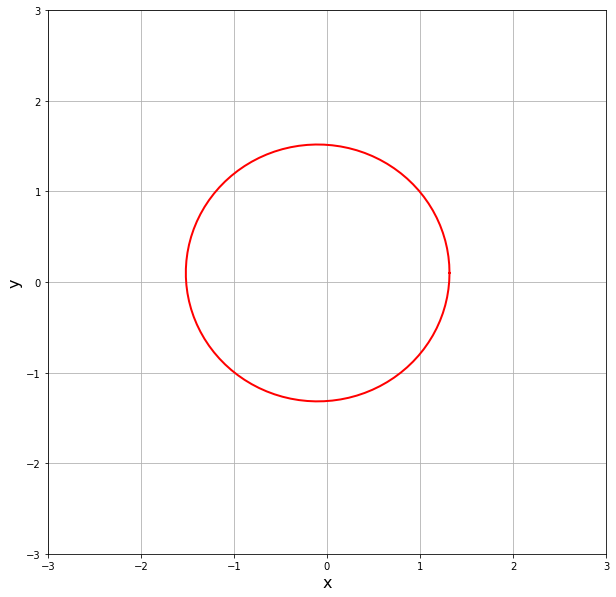

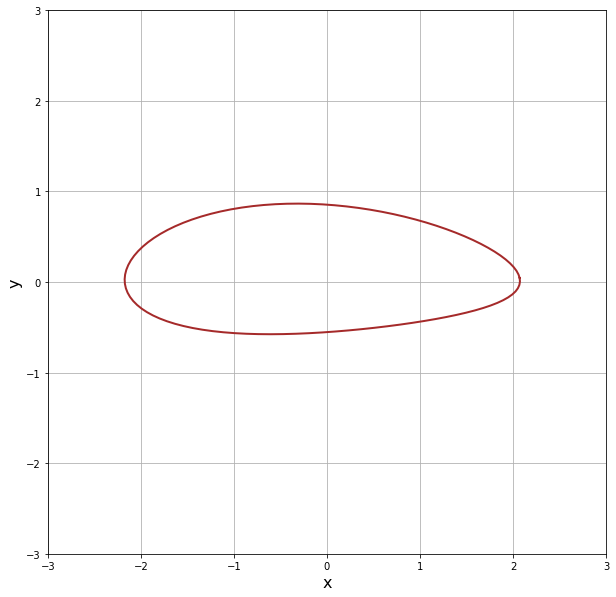

In [8]:
R,c,N = 1.4177,1.0,100
r1,r2=0.1,0.1
theta  = numpy.linspace(0,2*numpy.pi,N)
circ3 = R*numpy.cos(theta)-r1 + (R*numpy.sin(theta)+r2)*1j
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(circ3.real,circ3.imag, color = 'red',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

x3 = jukowski(circ3,c)
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x3.real,x3.imag,color = 'brown',linewidth = 2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

# Excercise 3

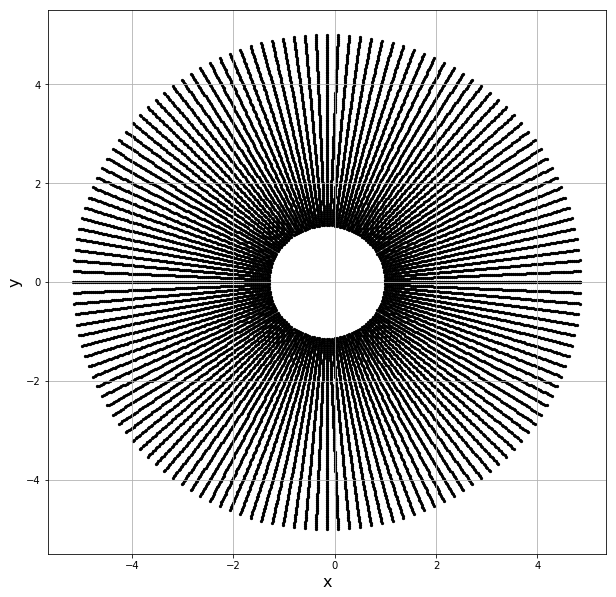

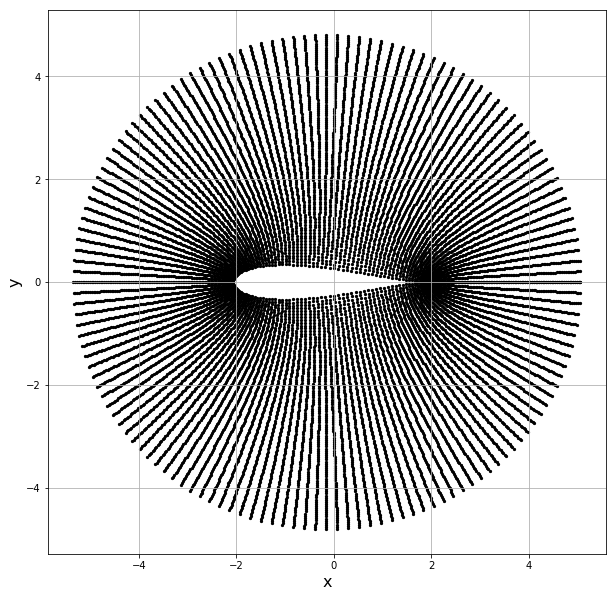

In [9]:
Nr,Ntheta = 100,145
rmin,rmax = 1.15,5.0
r = numpy.linspace(rmin,rmax,Nr)
theta = numpy.linspace(0,2*numpy.pi,Ntheta)
R,theta1 = numpy.meshgrid(r,theta)
z = R*numpy.cos(theta1)+c-rmin + R*numpy.sin(theta1)*1j
pyplot.figure(figsize = (size,size))
pyplot.grid(1)
pyplot.scatter(z.real,z.imag, color = 'k', s = 5)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

x3 = jukowski(z,c)
pyplot.figure(figsize=(size,size))
pyplot.grid(True)
pyplot.scatter(x3.real,x3.imag,color = 'k',s = 5)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

# Excercise 4

In [10]:
u_inf = 1.0
X_z = z.real
Y_z = z.imag
psi_free = u_inf*Y_z

In [11]:
def get_vel_psi_doublet (strength,xd,yd,X,Y):
    u = -strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/(((X-xd)**2 + (Y-yd)**2)**2)
    v = -strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)**2
    psi = -strength/(2*numpy.pi)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)
    return u,v,psi

In [12]:
strength_doublet = 2*numpy.pi*rmin**2*u_inf
xd, yd = c-rmin,0
u_doublet,v_doublet,psi_doublet = get_vel_psi_doublet(strength_doublet,xd,yd,X_z,Y_z)

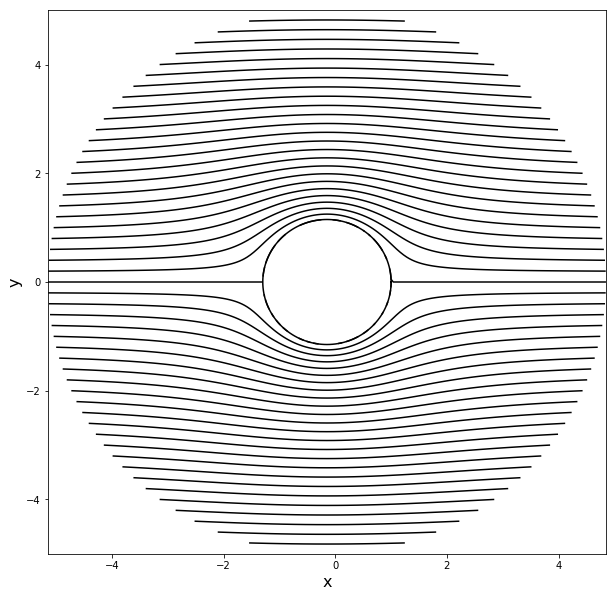

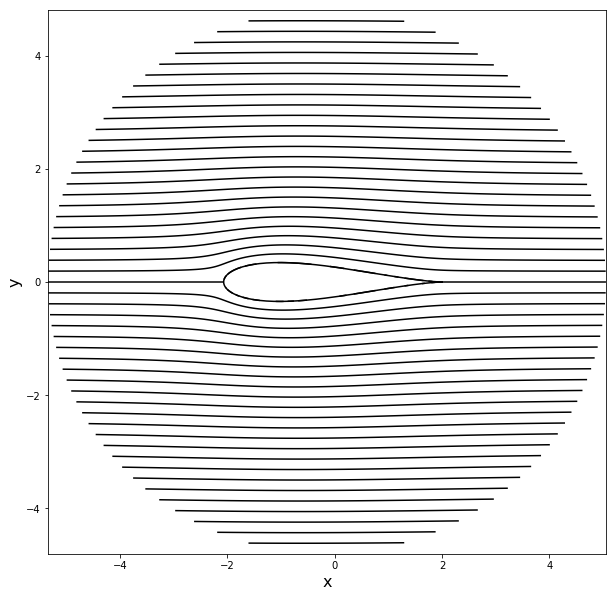

In [13]:
u_z = u_doublet + u_inf
v_z = v_doublet
psi_z = psi_free + psi_doublet
z_inner = rmin*numpy.cos(theta)+c-rmin + rmin*numpy.sin(theta)*1j
pyplot.figure(figsize=(size,size))
pyplot.contour(X_z,Y_z,psi_z,levels = numpy.linspace(numpy.min(psi_z),numpy.max(psi_z),51),colors = 'k',linestyles = 'solid')
pyplot.plot(z_inner.real,z_inner.imag,color = 'k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

X_x3,Y_x3 = x3.real,x3.imag
psi_x3 = psi_z
x3_inner = jukowski(z_inner,c)
pyplot.figure(figsize=(size,size))
pyplot.contour(X_x3,Y_x3,psi_x3,levels=numpy.linspace(numpy.min(psi_x3),numpy.max(psi_x3),51),colors = 'k',linestyles='solid')
pyplot.plot(x3_inner.real,x3_inner.imag,color='k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


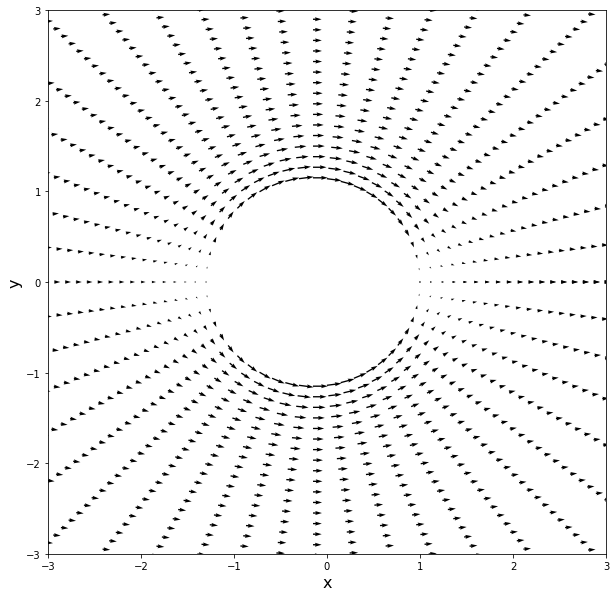

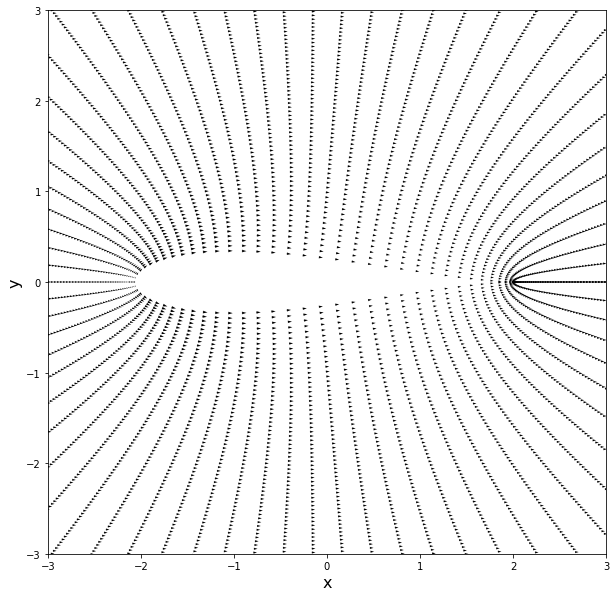

In [14]:
size = 10
pyplot.figure(figsize=(size,size))
pyplot.quiver(X_z[::3,::3],Y_z[::3,::3],u_z[::3,::3],v_z[::3,::3])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

V_z = u_z - v_z*1j
V_x1 = V_z/(1-(c/z)**2);
#plot
pyplot.figure(figsize=(size,size))
pyplot.quiver(X_x3[::2],Y_x3[::2],V_x1.real[::2],-V_x1.imag[::2])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

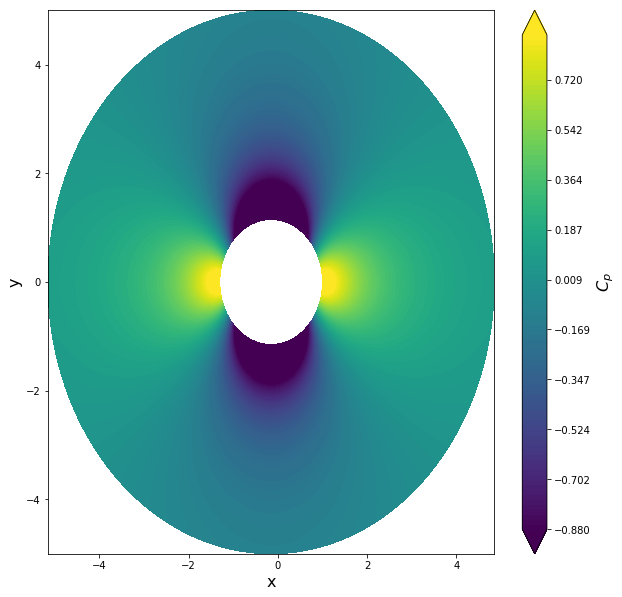

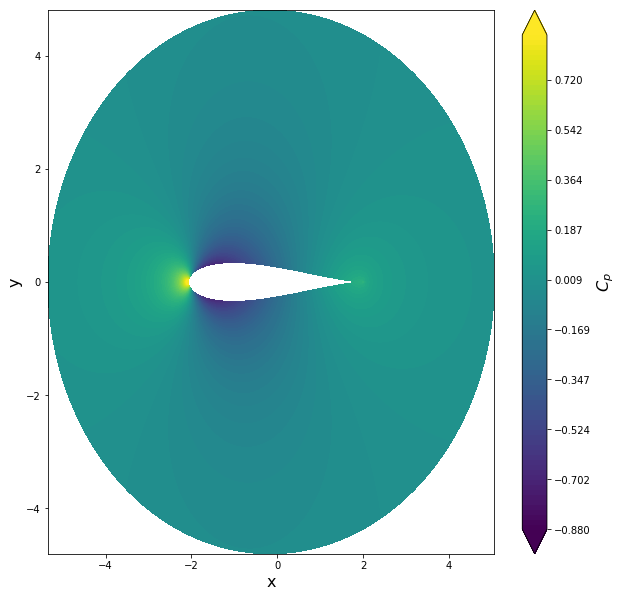

In [15]:
cp_z = 1-(u_z**2+v_z**2)/u_inf**2
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(X_z, Y_z, cp_z, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

cp_xi = 1-((V_x1.real**2+V_x1.imag**2)/u_inf**2)
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(X_x3, Y_x3, cp_xi, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

In [16]:
strength_doublet

8.309512568745001

In [17]:
V_x1[61,0]

(1.1063384662852436-0.52363334929849692j)

In [18]:
numpy.min(cp_xi[1:,0])

-0.68775567409240423

# Excercise 5

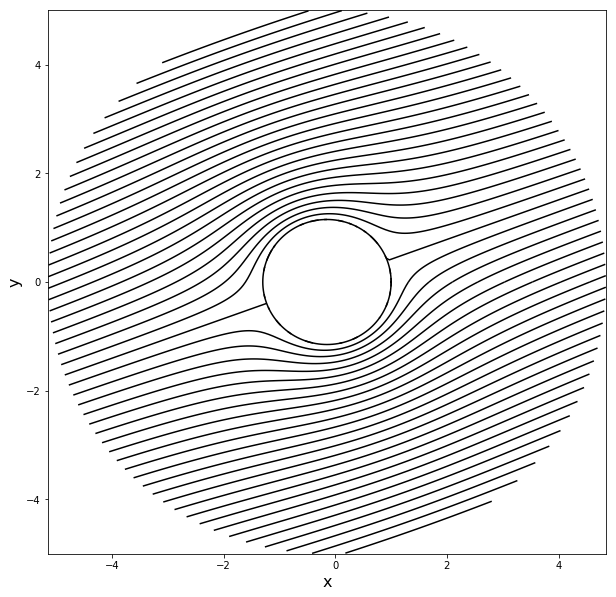

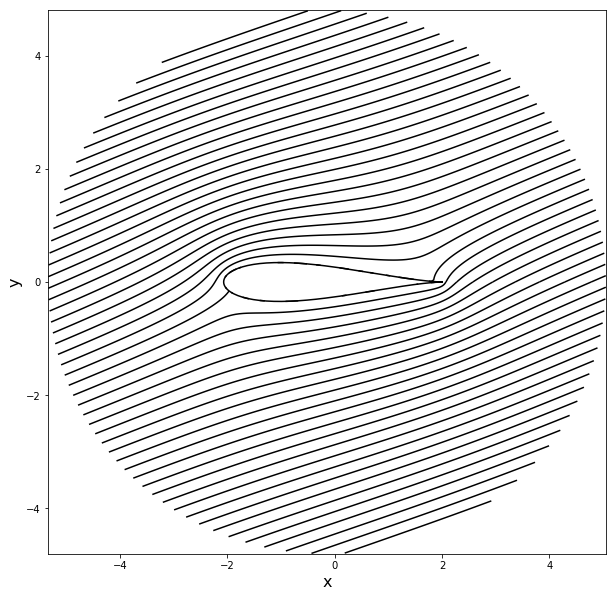

In [19]:
aoa = 20*math.pi/180
xc = c-rmin
x_prime = (X_z-xc)*numpy.cos(aoa) + Y_z*numpy.sin(aoa)
y_prime = -(X_z-xc)*numpy.sin(aoa) + Y_z*numpy.cos(aoa)
x_doublet_new,y_doublet_new = 0,0
u_doublet_prime,v_doublet_prime,psi_doublet_prime = get_vel_psi_doublet(strength_doublet,x_doublet_new,y_doublet_new,x_prime,y_prime)
u_prime = u_doublet_prime + u_inf
psi_free_prime = u_inf*y_prime
psi_prime = psi_doublet_prime + psi_free_prime
pyplot.figure(figsize=(size,size))
pyplot.contour(X_z,Y_z,psi_prime,levels = numpy.linspace(numpy.min(psi_prime),numpy.max(psi_prime),51),colors = 'k',linestyles = 'solid')
pyplot.plot(z_inner.real,z_inner.imag,color = 'k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.figure(figsize=(size,size))
pyplot.contour(X_x3,Y_x3,psi_prime,levels = numpy.linspace(numpy.min(psi_prime),numpy.max(psi_prime),51),colors = 'k',linestyles = 'solid')
pyplot.plot(x3_inner.real,x3_inner.imag,color = 'k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


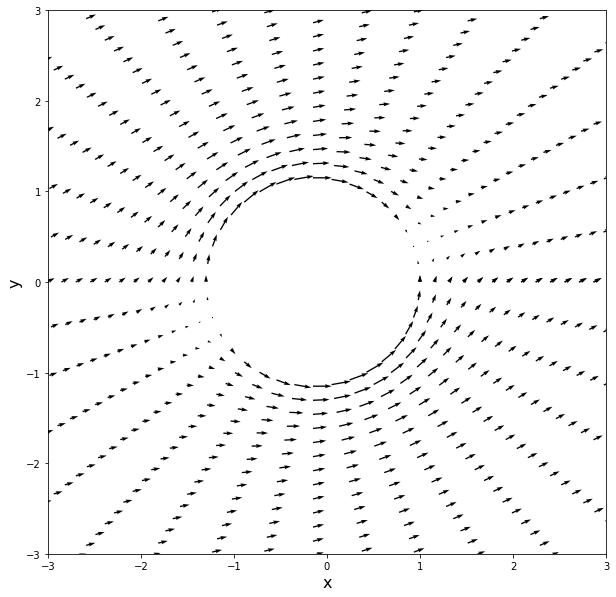

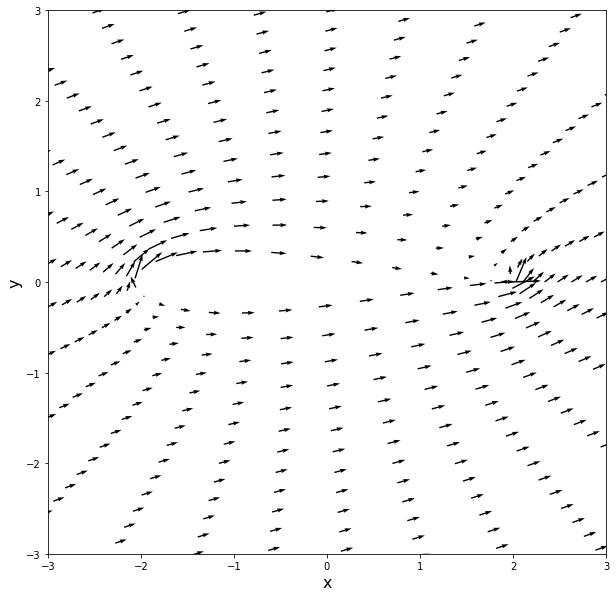

In [20]:
V_z_new = (u_prime - v_doublet_prime*1j)*numpy.exp(-aoa*1j)
pyplot.figure(figsize=(size,size))
pyplot.quiver(X_z[::4,::4],Y_z[::4,::4],V_z_new.real[::4,::4],-V_z_new.imag[::4,::4])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

V_xi_new = V_z_new/(1-(c/z)**2);
pyplot.figure(figsize=(size,size))

pyplot.quiver(X_x3[::5,::5],Y_x3[::5,::5],V_xi_new.real[::5,::5],-V_xi_new.imag[::5,::5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

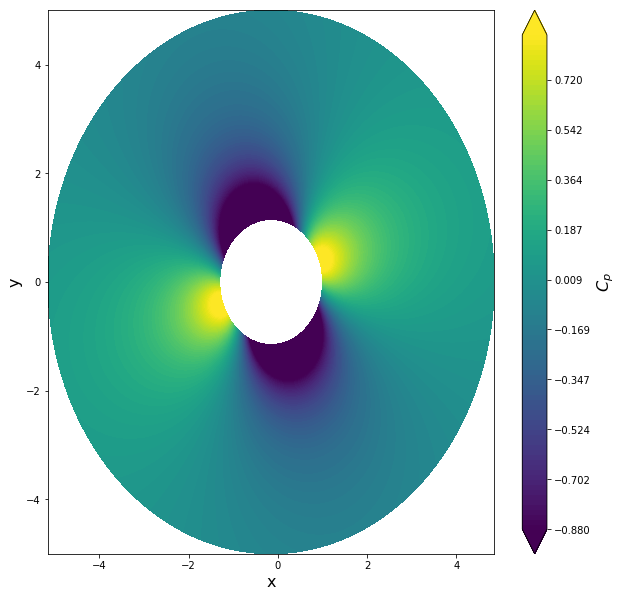

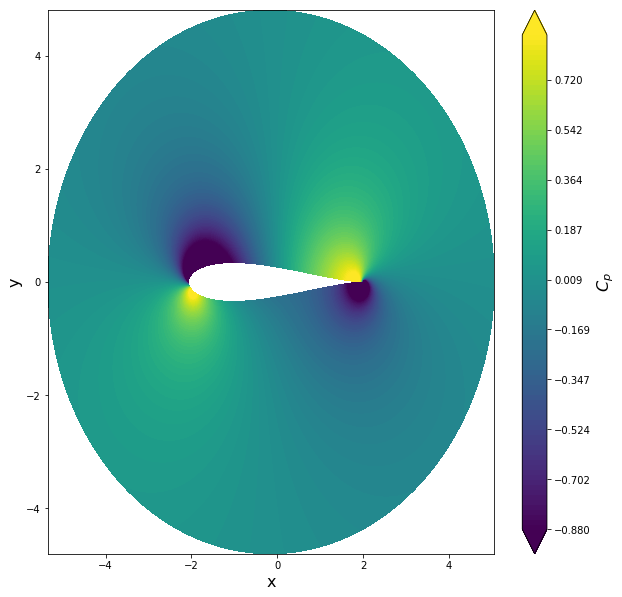

In [21]:
cp_z_new = 1-(V_z_new.real**2 + V_z_new.imag**2)/u_inf**2
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(X_z, Y_z, cp_z_new, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

cp_xi_new = 1-((V_xi_new.real**2+V_xi_new.imag**2)/u_inf**2)
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(X_x3, Y_x3, cp_xi_new, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

1) Do you think the flow over the airfoil we obtained here is reasonable? Why or why not?

Ans: No.

2) Where are the stagnation points on the airfoil?

In [22]:
numpy.where(numpy.abs(V_xi_new.real[:,0]) < 1e-15)

(array([ 8, 80]),)

3) How much is the lift?

Ans: Zero. Since there is no circulation, there will be no lift.

4) How much is the drag?

Ans: Zero. Since potential flow is assumed, the pressure distribution over the surface of the airfoil is symmetric and there will be no drag.

5) What is the velocity at the 50th point on the airfoil surface?

In [23]:
V_xi_new[49,0]

(1.4830654150147842-0.092075495007288205j)

6) What is the pressure coefficient at the 75th point on the airfoil surface?

In [24]:
cp_xi_new[74,0]

-0.48520991643725964

# Excercise 6

In [25]:
def get_vel_psi_vortex(strength, xv, yv, X, Y):
    u = strength/(2*numpy.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*numpy.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    psi = strength/(4*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return u,v,psi

In [26]:
strength_vortex = -strength_doublet*numpy.sin(-2*aoa)/(rmin*numpy.cos(-aoa))
x_vortex,y_vortex = 0,0
u_vortex,v_vortex,psi_vortex = get_vel_psi_vortex(strength_vortex,x_vortex,y_vortex,x_prime,y_prime)

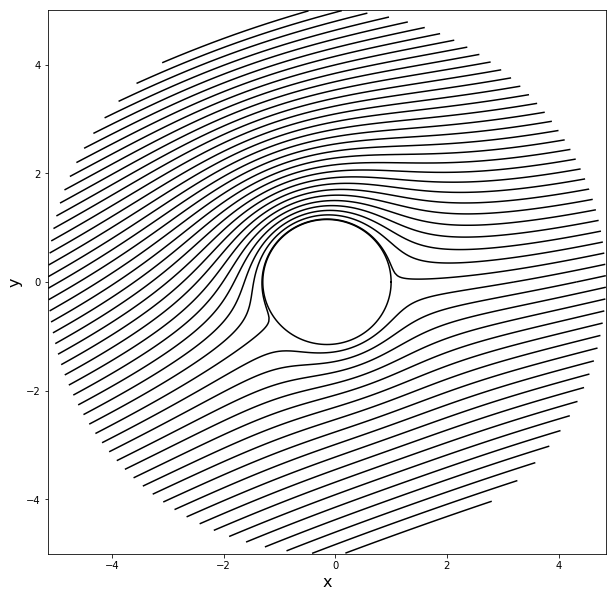

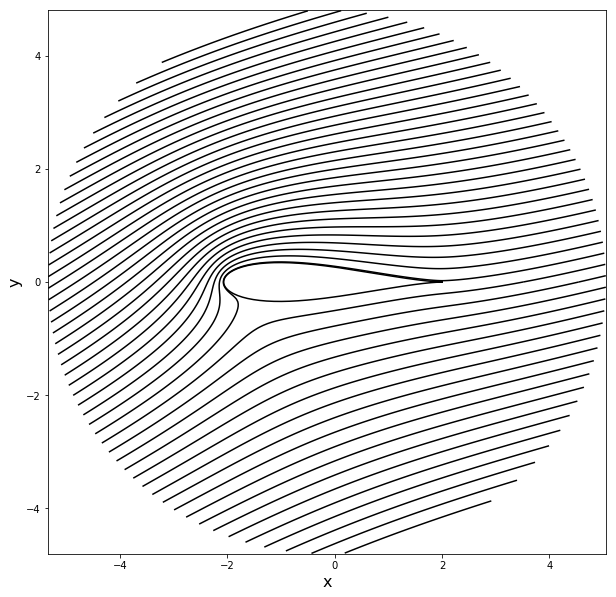

In [27]:
u_circulation = u_vortex + u_prime
v_circulation = v_vortex + v_doublet_prime
psi_circulation = psi_vortex + psi_prime

V_z_circulation = (u_circulation - v_circulation*1j)*numpy.exp(-aoa*1j)
pyplot.figure(figsize=(size,size))
pyplot.contour(X_z,Y_z,psi_circulation,levels = numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
pyplot.plot(z_inner.real,z_inner.imag,color = 'k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.figure(figsize=(size,size))
pyplot.contour(X_x3,Y_x3,psi_circulation,levels = numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
pyplot.plot(x3_inner.real,x3_inner.imag,color = 'k')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


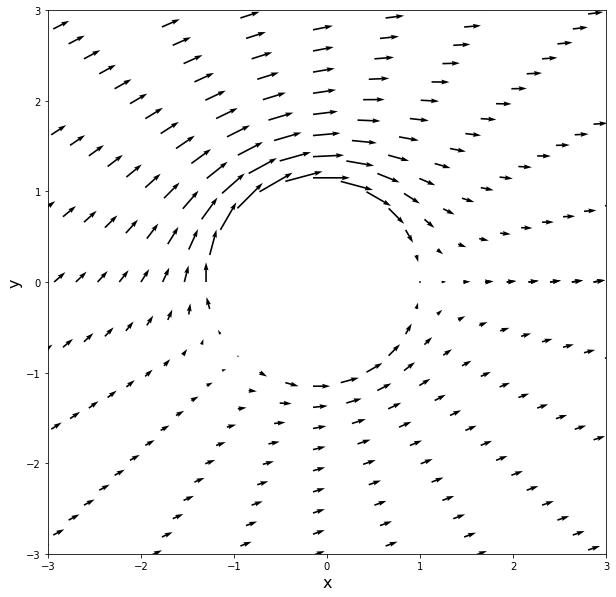

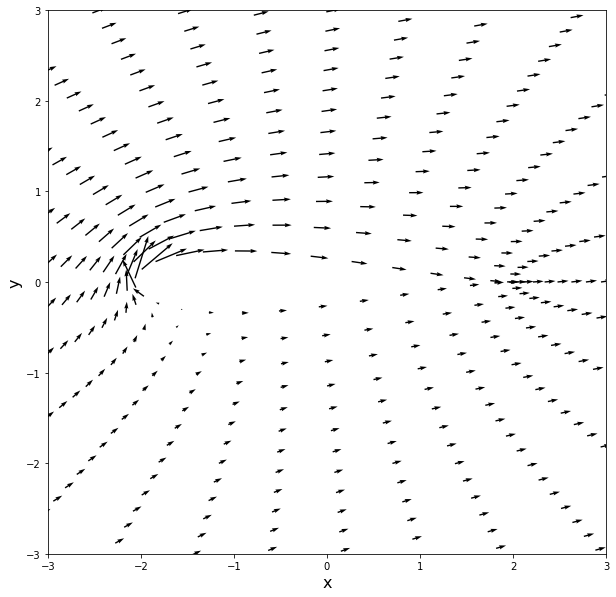

In [28]:
pyplot.figure(figsize=(size,size))
pyplot.quiver(X_z[::6,::6],Y_z[::6,::6],V_z_circulation.real[::6,::6],-V_z_circulation.imag[::6,::6])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

V_xi_circulation = V_z_circulation/(1-(c/z)**2);
pyplot.figure(figsize=(size,size))

pyplot.quiver(X_x3[::5,::5],Y_x3[::5,::5],V_xi_circulation.real[::5,::5],-V_xi_circulation.imag[::5,::5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

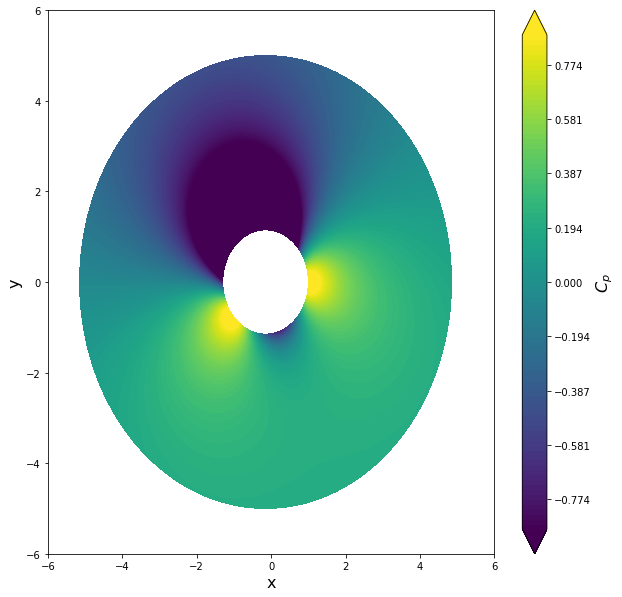

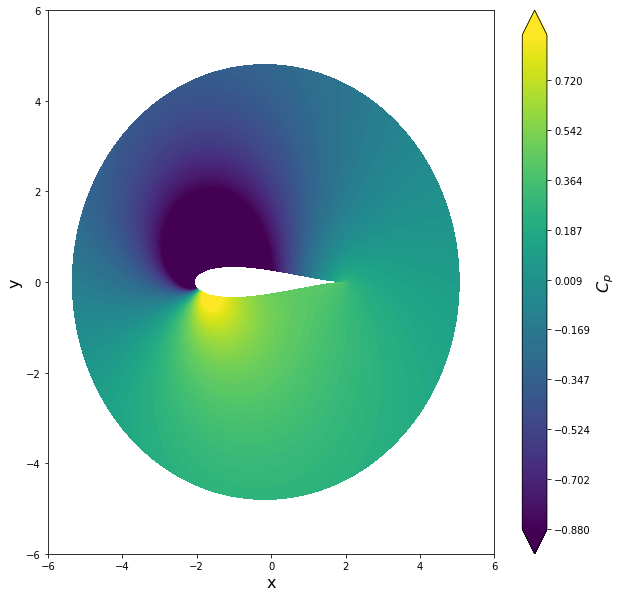

In [29]:
cp_z_circulation = 1-(V_z_circulation.real**2 + V_z_circulation.imag**2)/u_inf**2
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
contf = pyplot.contourf(X_z, Y_z, cp_z_circulation, levels=numpy.linspace(-0.88,0.88,101), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

cp_xi_circulation = 1-((V_xi_circulation.real**2+V_xi_circulation.imag**2)/u_inf**2)
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
contf = pyplot.contourf(X_x3, Y_x3, cp_xi_circulation, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

1) What is the strength of the vortex?

In [30]:
strength_vortex

4.9426446603975833

2) What is the lift?

The lift in the z-plane and the xi-plane should be equal. By using the Kutta-Jukowski condition for lift on a cylinder with free stream and circulation (assuming density of air = 1 kg/m3), we can calculate the lift component which is perpendicular to the free stream and the vertical component in the z-plane can be calculated accordingly.

In [31]:
ro = 1.0
Li = ro*u_inf*strength_vortex
Li*numpy.cos(aoa)

4.6445667145424814

3) How much is the drag?

Ans: The drag in the direction of free stream (i.e. the z' plane) should be zero as all the terms in the integral will go to zero.

4) Where are the stagnation points on the airfoil?

In [32]:
numpy.where(numpy.abs(V_xi_circulation[:,:]) < 1e-10)

(array([88]), array([0]))

The second stagnation point is at the trailing edge (1st point on the airfoil surface).

5) What is the velocity at the 92th point on the airfoil surface?

In [33]:
V_xi_circulation[91,0]

(0.20848311620747642+0.031988389195052508j)

6) What is the pressure coefficient at the 111th point on the airfoil surface?

In [34]:
cp_xi_circulation[110,0]

0.49669467238347365

7.) What is going on with the Pressure Coefficient at the Trailing Edge?

The pressure coefficient computed is going to negative infinity because the velocity at the trailing edge is calculated as infinity while shifting from z to z' plane. However, the pressure should be a finite value which is not accounted for due to our potential flow approximation which discounts viscous effects.